In [70]:
'''
this code written by me not like the first task
'''
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from google.colab import drive
drive.mount('/content/drive/',force_remount=False)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [71]:
training_data=pd.read_csv('/content/drive/My Drive/binary_classifier_data/training.csv',sep=";")
val_data=pd.read_csv('/content/drive/My Drive/binary_classifier_data/validation.csv',sep=";")
val_data.dropna(inplace=True)
training_data.dropna(inplace=True)
training_data

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,"17,92","5,4e-05",u,g,c,v,"1,75",f,t,1,t,g,80.0,5,800000.0,t,0,no.
2,b,"31,25","0,0001125",u,g,ff,ff,0,f,t,1,f,g,96.0,19,960000.0,t,0,no.
4,b,"32,33","0,00035",u,g,k,v,"0,5",f,f,0,t,g,232.0,0,2320000.0,f,0,no.
5,a,"34,83","0,000125",y,p,i,h,"0,5",f,f,0,t,g,160.0,0,1600000.0,f,0,no.
10,a,"24,75","0,0013665",u,g,q,h,"1,5",f,f,0,f,g,280.0,1,2800000.0,f,0,no.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3690,b,"23,92","0,00015",u,g,d,h,"1,875",t,t,6,f,g,200.0,327,2000000.0,t,1,yes.
3693,a,25,"0,001233",u,g,cc,h,"3,5",t,t,6,f,g,400.0,458,4000000.0,t,1,yes.
3694,b,"25,5","3,75e-05",u,g,m,v,"0,25",t,t,3,f,g,260.0,15108,2600000.0,t,1,yes.
3696,a,"23,5",9e-04,u,g,q,v,"8,5",t,t,5,t,g,120.0,0,1200000.0,t,1,yes.


In [72]:
def indicate_unique(col):
  return pd.unique(col)
indicate_unique(training_data['classLabel'])

array(['no.', 'yes.'], dtype=object)

In [73]:
#replace all categorical variables with numircal values 
def cat_to_num(data):
  data['variable1']=data['variable1'].apply(lambda val : 1 if val =="a" else 0, 1 )
  data['variable9']=data['variable9'].apply(lambda val : 1 if val =="t" else 0, 1 )
  data['variable10']=data['variable10'].apply(lambda val : 1 if val =="t" else 0, 1 )
  data['variable12']=data['variable12'].apply(lambda val : 1 if val =="t" else 0, 1 )
  data['variable18']=data['variable18'].apply(lambda val : 1 if val =="t" else 0, 1 )
  data['variable4'].replace({
      "u":0,
      "y":1,
      "l":2
  },inplace=True)
  data['variable5'].replace({
      "g":0,
      "p":1,
      "gg":2
  },inplace=True)
  data['variable6'].replace({
      "c":0,
      "ff":1,
      "k":2,
      "i":3,
      "q":4,
      "j":5,
      "W":6,
      "d":7,
      "aa":8,
      "cc":9,
      "x":10,
      "e":11,
      "m":12,
      "r":13
  },inplace=True)
  data['variable7'].replace({
      "v":0,
      "ff":1,
      "h":2,
      "j":3,
      "bb":4,
      "n":5,
      "dd":6,
      "o":7,
      "z":8
  },inplace=True)
  data['variable13'].replace({
      "g":0,
      "s":1,
      "p":2
  },inplace=True)
  data['classLabel'].replace({
      'no.':0,
      'yes.':1
  },inplace=True)

In [74]:
#edit the foramt of the variables and it's data type
def format_datatype(data):
  data['variable2']=data['variable2'].apply(lambda val : float(val.replace(",",".")))
  data['variable8']=data['variable8'].apply(lambda val : float(val.replace(",",".")))
  data['variable3']=data['variable3'].apply(lambda val : float(val.replace(",",".")))

In [75]:
def normalizaion(data):
  data['variable2']=data['variable2'].apply(lambda v : ((v-data['variable2'].min())/(data['variable2'].max()-data['variable2'].min())))
  data['variable8']=data['variable8'].apply(lambda v : ((v-data['variable8'].min())/(data['variable8'].max()-data['variable8'].min())))
  data['variable14']=data['variable14'].apply(lambda v : ((v-data['variable14'].min())/(data['variable14'].max()-data['variable14'].min())))
training_data=training_data.drop('variable15',1)
training_data=training_data.drop('variable17',1)
val_data=val_data.drop('variable15',1)
val_data=val_data.drop('variable17',1)

{'boxes': [<matplotlib.lines.Line2D at 0x7f8de55fe320>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8de55fed30>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8de560a7f0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8de560a470>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8de55fe630>,
  <matplotlib.lines.Line2D at 0x7f8de55fe9b0>]}

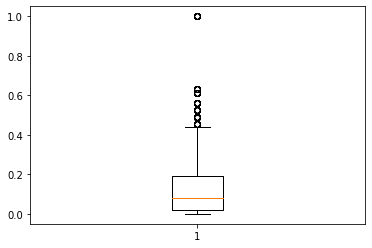

In [76]:
cat_to_num(training_data)
format_datatype(training_data)
normalizaion(training_data)
cat_to_num(val_data)
format_datatype(val_data)
normalizaion(val_data)
import matplotlib.pyplot as plt
plt.boxplot(training_data['variable8'])

In [77]:
#remove the outlir of the data
def remove_outliers(data):
  low=0.1
  high=0.9
  qdata=data.quantile([low,high])
  data.variable2=data.variable2.apply(lambda v : v if qdata.variable2[low] < v < qdata.variable2[high] else np.nan)
  data.variable8=data.variable8.apply(lambda v : v if qdata.variable8[low] < v < qdata.variable8[high] else np.nan)
  data.variable14=data.variable14.apply(lambda v : v if qdata.variable14[low] < v < qdata.variable14[high] else np.nan)
  data.dropna(inplace=True)
remove_outliers(training_data)
remove_outliers(val_data)
training_data

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable18,variable19,classLabel
4,0,0.287498,0.000350,0,0,2,0,0.017544,0,0,0,1,0,0.276190,0,0,0
5,1,0.330848,0.000125,1,1,3,2,0.017544,0,0,0,1,0,0.190476,0,0,0
10,1,0.156060,0.001367,0,0,4,2,0.052632,0,0,0,0,0,0.333333,0,0,0
17,0,0.271718,0.001550,0,0,0,0,0.017544,1,0,0,0,0,0.142857,0,0,0
20,0,0.294781,0.000234,0,0,7,2,0.201754,0,0,0,1,0,0.347619,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3681,0,0.276053,0.001617,0,0,7,0,0.105263,1,1,9,0,0,0.297619,1,1,1
3687,1,0.086700,0.001033,0,0,9,2,0.011754,1,1,1,1,0,0.095238,1,1,1
3690,0,0.141668,0.000150,0,0,7,2,0.065789,1,1,6,0,0,0.238095,1,1,1
3694,0,0.169065,0.000037,0,0,12,0,0.008772,1,1,3,0,0,0.309524,1,1,1


{'boxes': [<matplotlib.lines.Line2D at 0x7f8de55d2c88>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8de55e16d8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8de556a198>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8de55e1dd8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8de55d2f98>,
  <matplotlib.lines.Line2D at 0x7f8de55e1358>]}

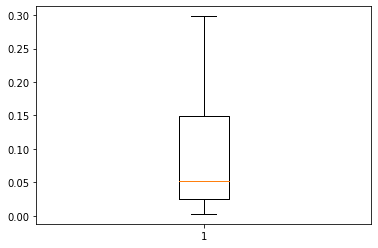

In [78]:
plt.boxplot(training_data['variable8'])

In [79]:
#training the model
X_training=training_data.drop(columns=['classLabel'])
y_training=training_data.classLabel
X_test=val_data.drop(columns=['classLabel'])
y_test=val_data.classLabel
model=DecisionTreeClassifier()
model.fit(X_training,y_training)
prediction=model.predict(X_test)
score=accuracy_score(y_test,prediction)
print(f'{score * 100} % ')

50.0 % 


In [80]:
logreg=LogisticRegression()
logreg.fit(X_training,y_training)
prediction=logreg.predict(X_test)
score=accuracy_score(y_test,prediction)
print(f'{score * 100} % ')

57.89473684210527 % 
